In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
from scipy.stats import kruskal, wilcoxon, mannwhitneyu, median_test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

In [56]:
df = pd.read_csv('ESS_data.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [12]:
df.shape

(8594, 13)

In [11]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [57]:
df.dropna(how= 'any', inplace=True)

# Question 1. 
Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.


To determine which distribution comparison test to use, I must determine if the distribution of the variables follows any known distribution or if it is a non-parametric distribution. To do this, I will plot the histograms of trust for each country in each year.

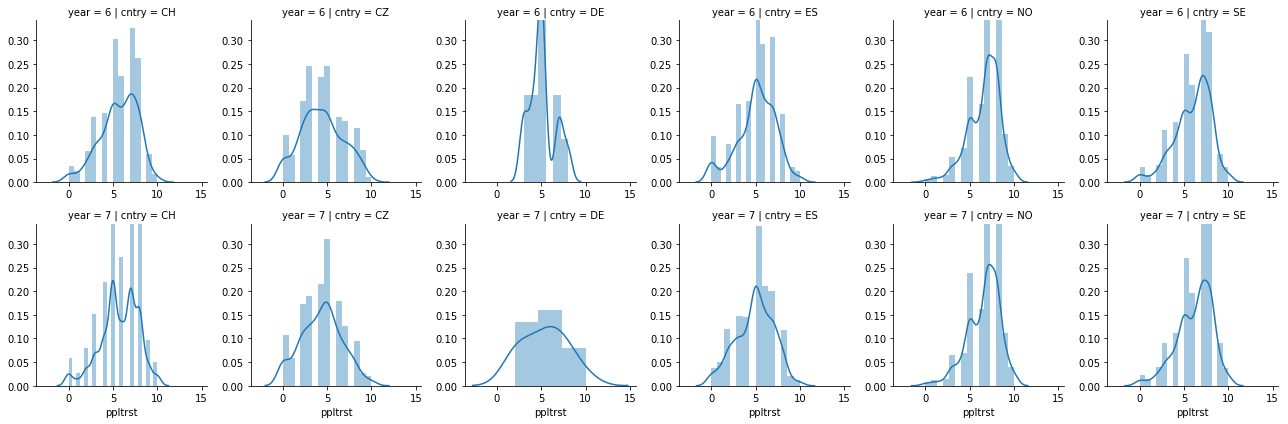

In [21]:
g = sns.FacetGrid(data = df, row = 'year', col="cntry")
g = g.map(sns.distplot, "ppltrst")
plt.show()

Let's do the normality test using Shapiro-Wilk test statistic

In [42]:
for country in df.cntry.unique():
    print(country)
    for yr in df.year.unique():
        print( yr, shapiro(df[(df.cntry == country) & (df.year == yr) ].ppltrst))
    print()


CH
6 (0.9517108201980591, 9.511383786695374e-15)
7 (0.9547930955886841, 2.4654701498145852e-14)

CZ
6 (0.9680074453353882, 3.6126571179018185e-10)
7 (0.9715777039527893, 1.8779569010973773e-09)

DE
6 (0.8929170966148376, 0.1069343090057373)
7 (0.9425466060638428, 0.4519253373146057)

ES
6 (0.949491024017334, 1.6942651933374377e-19)
7 (0.9663601517677307, 1.5275811452092943e-15)

NO
6 (0.9211018085479736, 8.881221102071063e-19)
7 (0.9292042255401611, 7.92943027973029e-18)

SE
6 (0.9367397427558899, 1.2586250953636158e-18)
7 (0.9376322627067566, 1.3852298444033788e-18)



The P values are below 0.05 for all countries except Denmark. For Denmark, data is approximately normally distributed.
But for all other counties, the data is not normally distributed. 
Since there are very few entries for Denmark, we might not be able to trust the results of parametric distribution tests. For these reasons, I will use non-parametric distribution tests to determine if trust has changed from 2012 to 2014.

Since this comparison is for the same group of people and the distributions are non-parametric, I will use the Wilcoxon signed-rank test to determine if there are differences between the distributions over the years.

In [41]:
df.groupby(['cntry','year']).size()

cntry  year
CH     6        732
       7        743
CZ     6        601
       7        606
DE     6         13
       7         14
ES     6       1158
       7       1134
NO     6        708
       7        712
SE     6        859
       7        867
dtype: int64

We have slightly different numbers of responders in 2012 and 2014, so we now need to make sure we're only inlcuding
idnos where the person responded for both years

In [61]:

df_12 = df[df['year'] == 6]
df_14 = df[df['year'] == 7]

print(len(df_12))
print(len(df_14))

4071
4076


In [62]:
result = df_12.merge(df_14, on = ['cntry', 'idno'], how = 'inner')

In [64]:
result.shape

(3877, 24)

In [65]:
result.head()

,cntry,idno,year_x,tvtot_x,ppltrst_x,pplfair_x,pplhlp_x,happy_x,sclmeet_x,sclact_x,...,tvtot_y,ppltrst_y,pplfair_y,pplhlp_y,happy_y,sclmeet_y,sclact_y,gndr_y,agea_y,partner_y
0,CH,5,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,...,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
1,CH,25,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,...,4.0,4.0,2.0,5.0,6.0,5.0,3.0,1.0,30.0,1.0
2,CH,26,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,...,3.0,8.0,8.0,6.0,8.0,7.0,5.0,2.0,49.0,2.0
3,CH,28,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,...,2.0,7.0,7.0,5.0,9.0,6.0,2.0,1.0,51.0,1.0
4,CH,29,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,...,2.0,4.0,7.0,0.0,8.0,6.0,2.0,2.0,32.0,2.0


So now the var_x data corresponds to 2012 and var_y corresponds to 2014.

We have 3,877 responders who responded to all questions in both 2012 and 2014.

In [70]:
for cntry in set(result['cntry']) :
    if cntry != 'DE':
        trust_2012 = result[result['cntry'] == cntry]['ppltrst_x']
        trust_2014 = result[result['cntry'] == cntry]['ppltrst_y']

        print('Country',cntry)
    
        print('Avg Trust in 2012: {}'.format(np.mean(trust_2012)))
        print('Avg Trust in 2014: {}\n'.format(np.mean(trust_2014)))
        print(stats.wilcoxon(trust_2012, trust_2014), '\n')

Country CZ
Avg Trust in 2012: 4.39748201438849
Avg Trust in 2014: 4.368705035971223

WilcoxonResult(statistic=61723.5, pvalue=0.83906007718038333) 

Country NO
Avg Trust in 2012: 6.637155297532656
Avg Trust in 2014: 6.5747460087082725

WilcoxonResult(statistic=75026.5, pvalue=0.62214464151967219) 

Country CH
Avg Trust in 2012: 5.691654879773692
Avg Trust in 2014: 5.724186704384724

WilcoxonResult(statistic=88744.5, pvalue=0.68708262982731094) 

Country ES
Avg Trust in 2012: 5.121658986175115
Avg Trust in 2014: 4.941013824884792

WilcoxonResult(statistic=197976.0, pvalue=0.03498230453843465) 

Country SE
Avg Trust in 2012: 6.03627569528416
Avg Trust in 2014: 6.259975816203144

WilcoxonResult(statistic=104619.5, pvalue=0.020616883287247222) 



Here the Null Hypothesis is that the distributions have the same median. 
Only for countries ES and SE, the p value is < 0.05. 
so we CAN reject the null hypothesis for ES (Spain) and SE (Sweden). 


In [73]:
print(ttest_rel(result[result['cntry'] == 'DE']['ppltrst_x'], result[result['cntry'] == 'DE']['ppltrst_y']))

Ttest_relResult(statistic=-0.1834682235710276, pvalue=0.85749416625851327)


the p value is > 0.05, so we can say that for Denmark, there is no change in trust between 2012 and 2014.

From Wilcoxon and t-test rel results, We can say that 
people's trust decreased in Spain and increased in Sweden between 2012 and 2014. 
We cannot say that trust levels changed in the other countries during this time.

# Question 2. 
Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [75]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


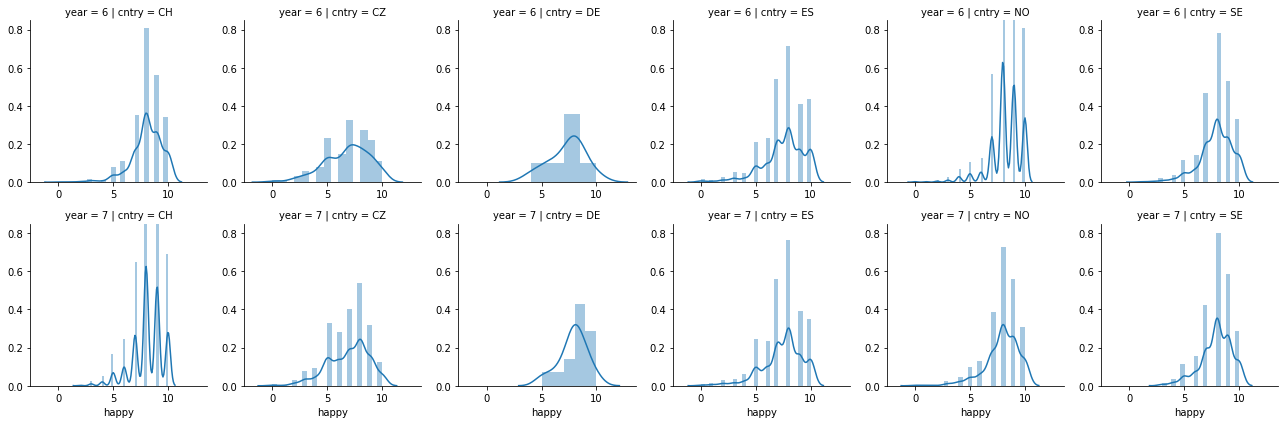

In [76]:
g = sns.FacetGrid(data = df, row = 'year', col="cntry")
g = g.map(sns.distplot, "happy")
plt.show()

In [77]:
for country in df.cntry.unique():
    print(country)
    for yr in df.year.unique():
        print( yr, shapiro(df[(df.cntry == country) & (df.year == yr) ].happy))
    print()


CH
6 (0.8773602843284607, 1.4611401593361174e-23)
7 (0.8950787782669067, 4.273768685964887e-22)

CZ
6 (0.9462587833404541, 5.939277796787254e-14)
7 (0.944864809513092, 3.1645106863707403e-14)

DE
6 (0.9160984754562378, 0.22211012244224548)
7 (0.9213663339614868, 0.23006466031074524)

ES
6 (0.9052610397338867, 3.4151276945678624e-26)
7 (0.9136462211608887, 6.898763644671094e-25)

NO
6 (0.8498518466949463, 2.291937245544563e-25)
7 (0.8795286417007446, 4.680781911775775e-23)

SE
6 (0.9025380611419678, 5.918160728712866e-23)
7 (0.9121034145355225, 5.600535793318595e-22)



For the same reasons as above question, we will do wilcoxon test on all countries except denmark.

In [78]:
for cntry in set(result['cntry']) :
    if cntry != 'DE':
        happy_2012 = result[result['cntry'] == cntry]['happy_x']
        happy_2014 = result[result['cntry'] == cntry]['happy_y']

        print('Country',cntry)
    
        print('Avg happy in 2012: {}'.format(np.mean(happy_2012)))
        print('Avg happy in 2014: {}\n'.format(np.mean(happy_2014)))
        print(stats.wilcoxon(happy_2012, happy_2014), '\n')
        
print(ttest_rel(result[result['cntry'] == 'DE']['happy_x'], result[result['cntry'] == 'DE']['happy_y']))        

Country CZ
Avg happy in 2012: 6.780575539568345
Avg happy in 2014: 6.9352517985611515

WilcoxonResult(statistic=55932.0, pvalue=0.22849644123659796) 

Country NO
Avg happy in 2012: 8.253991291727141
Avg happy in 2014: 7.90566037735849

WilcoxonResult(statistic=60547.0, pvalue=1.4306917852645772e-05) 

Country CH
Avg happy in 2012: 8.074964639321076
Avg happy in 2014: 8.123055162659123

WilcoxonResult(statistic=75726.5, pvalue=0.75756074356396752) 

Country ES
Avg happy in 2012: 7.545622119815668
Avg happy in 2014: 7.450691244239631

WilcoxonResult(statistic=190064.5, pvalue=0.15739932727037309) 

Country SE
Avg happy in 2012: 7.894800483675938
Avg happy in 2014: 7.94074969770254

WilcoxonResult(statistic=103562.0, pvalue=0.58959412298418135) 

Ttest_relResult(statistic=-1.144805749801318, pvalue=0.27461012937559681)


From these results we can conclude that people in Norway (NO) became less happy from 2012 to 2014. We cannot claim that happiness levels changed significantly in other countries during this time.

# Question 3 
Who reported watching more TV in 2012, men or women?

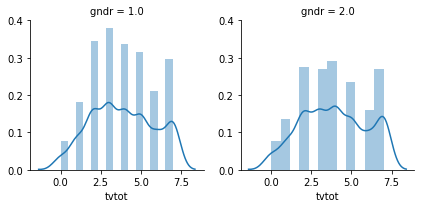

In [83]:
g = sns.FacetGrid(data = df[df.year==6], col="gndr")
g = g.map(sns.distplot, "tvtot")
plt.show()

In [89]:
tv_tot_male = df[(df.year == 6) & (df.gndr == 1.0)].tvtot
tv_tot_female = df[(df.year == 6) & (df.gndr == 2.0)].tvtot
print(shapiro(tv_tot_male))
print(shapiro(tv_tot_female))

(0.9443334937095642, 3.718612884828085e-27)
(0.9407297372817993, 1.0867231118970029e-27)


For year 2012, p value is < 0.05 for both groups, so we reject the null hypothesis that the data is normally distributed.

This tells us we have to use non-parametric tests. 

In this case, we have two independent samples, so we can use any of scipy.stats.mannwhitneyu , scipy.stats.median_test or scipy.stats.kruskal


In [90]:
print(tv_tot_male.mean())
print(tv_tot_female.mean())

3.8592303945445687
3.9053518334985133


In [91]:
mannwhitneyu(tv_tot_male , tv_tot_female)

MannwhitneyuResult(statistic=2042391.5, pvalue=0.21654019333228419)

The p value is > 0.05. So we accept the null hypothesis.
Men and women did not watch measurably different amounts of TV in 2012.

# Question 4
Who was more likely to believe people were fair in 2012, people with a partner or people living alone?

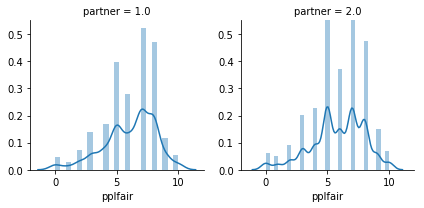

In [92]:
g = sns.FacetGrid(data = df[df.year==6], col="partner")
g = g.map(sns.distplot, "pplfair")
plt.show()

In [93]:
with_part_fair = df[(df.year == 6) & (df.partner == 1.0)].pplfair
single_fair = df[(df.year == 6) & (df.partner == 2.0)].pplfair
print(shapiro(with_part_fair))
print(shapiro(single_fair))

(0.9396088123321533, 5.344745707680362e-31)
(0.9547916650772095, 2.436869843664993e-21)


For 2012, p < 0.05 for both groups, so we reject the null hypothesis that the data is normally distributed. This tells us we have to use non-parametric tests. 
In this case, we have independent samples, so we can use the same tests we used for question 3.

In [95]:
print('Avg Fairness with Partner',with_part_fair.mean())
print('Avg Fairness without Partner',single_fair.mean())
print(mannwhitneyu(with_part_fair, single_fair))

Avg Fairness with Partner 6.0743509047993705
Avg Fairness without Partner 5.86592544146501
MannwhitneyuResult(statistic=1819821.5, pvalue=0.00028258143613772957)


The Mann-Whitney U test suggests that people living with a partner are more likely to think people are fair to them in 2012. 


# Question 5
Pick three or four of the countries in the sample and compare how often people met socially in 2014. 
Are there differences, and if so, which countries stand out?


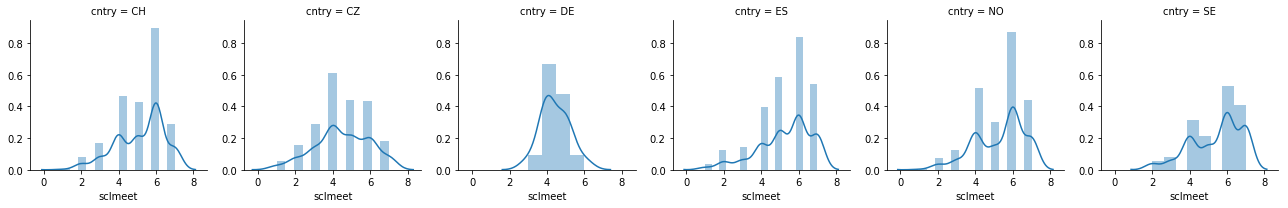

In [96]:
g = sns.FacetGrid(data = df[df.year== 7 ], col="cntry")
g = g.map(sns.distplot, "sclmeet")
plt.show()

In [97]:
cz_meet = df[((df['year'] == 7) & (df['cntry'] == 'CZ'))]['sclmeet']
No_meet = df[((df['year'] == 7) & (df['cntry'] == 'NO'))]['sclmeet']
es_meet = df[((df['year'] == 7) & (df['cntry'] == 'ES'))]['sclmeet']
print(shapiro(cz_meet))
print(shapiro(No_meet))
print(shapiro(es_meet))

(0.9442529678344727, 2.5792776660142624e-14)
(0.887718915939331, 2.5375396023327397e-22)
(0.8927679657936096, 2.280180298346974e-27)


Once again, it appears that we cannot assume a normal distribution and need to use non-parametric tests. Because we have more than two groups, and the samples are independent, we can use the Kruskal–Wallis and Median tests to see if any one of the 3 countries has a different median

In [98]:
kruskal(cz_meet,No_meet, es_meet )

KruskalResult(statistic=137.99764626257269, pvalue=1.0819117969111045e-30)

The p-value < 0.05, which means we reject the null hypothesis that the medians of all groups are equal

To compare two countries , in non parametric test, we can use either kruskal or mannwhitneyu

In [100]:
print('Compare CZ with NO :\n',mannwhitneyu(cz_meet,No_meet))
print('Compare NO with ES : \n', mannwhitneyu(No_meet, es_meet))
print('Compare CZ with ES :\n',mannwhitneyu(cz_meet,es_meet ))

Compare CZ with NO :
 MannwhitneyuResult(statistic=147801.0, pvalue=2.4170120935752383e-24)
Compare NO with ES : 
 MannwhitneyuResult(statistic=400483.5, pvalue=0.38301876951707503)
Compare CZ with ES :
 MannwhitneyuResult(statistic=238281.0, pvalue=2.119303290451085e-27)


When Compared CZ with NO, the p value is < 0.05, So we can reject null hypothesis. Same when Compared CZ with ES.

The above results show that A (CZ) is different than both NO and ES with respect to the median Social Meet score. There is no significant difference between the medians of NO and ES, though.
    

# Question 6

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


In [146]:
age_sclact = df.loc[(df.year == 7) & (df.cntry.isin (['CZ','NO','ES'])), ['cntry','agea','sclact']].sort_values(by = 'agea')

In [147]:
age_sclact.cntry.value_counts()

ES    1134
NO     712
CZ     606
Name: cntry, dtype: int64

In [148]:
age_sclact.groupby(['cntry','agea']).sclact.mean()

cntry  agea
CZ     15.0    4.000000
       16.0    2.400000
       17.0    2.750000
       18.0    2.571429
       19.0    3.625000
       20.0    3.307692
       21.0    3.000000
       22.0    3.166667
       23.0    2.555556
       24.0    2.866667
       25.0    2.714286
       26.0    3.000000
       27.0    3.000000
       28.0    3.000000
       29.0    3.000000
       30.0    2.800000
       31.0    2.666667
       32.0    2.250000
       33.0    2.222222
       34.0    2.700000
       35.0    2.687500
       36.0    2.692308
       37.0    2.800000
       38.0    2.500000
       39.0    2.615385
       40.0    2.473684
       41.0    2.933333
       42.0    2.384615
       43.0    2.315789
       44.0    3.000000
                 ...   
NO     61.0    2.800000
       62.0    2.727273
       63.0    3.000000
       64.0    2.900000
       65.0    3.083333
       67.0    2.937500
       68.0    2.636364
       69.0    3.272727
       70.0    2.777778
       71.0    2.833333
    

In [166]:
age_bins = [0,20,39,59,79,200]
age_labels = ['<= 20', '20-39','40-59','60-79','80-200']
age_bin_df = pd.cut(age_sclact.agea ,age_bins, labels = age_labels )

In [167]:
age_sclact['age_bucket'] = age_bin_df

In [168]:
age_sclact.sample(20)

,cntry,agea,sclact,age_bucket
4160,ES,38.0,3.0,20-39
2852,CZ,73.0,3.0,60-79
2641,CZ,65.0,4.0,60-79
6249,NO,18.0,2.0,<= 20
4972,ES,49.0,3.0,40-59
6596,NO,55.0,3.0,40-59
5035,ES,27.0,3.0,20-39
4744,ES,89.0,2.0,80-200
6409,NO,44.0,3.0,40-59
6395,NO,42.0,3.0,40-59


In [169]:
for grp in age_sclact['age_bucket'].unique():
    cz_sclact = age_sclact[(age_sclact['cntry'] == 'CZ') & (age_sclact['age_bucket'] == grp)]['sclact']
    no_sclact = age_sclact[(age_sclact['cntry'] == 'NO') & (age_sclact['age_bucket'] == grp)]['sclact']
    es_sclact = age_sclact[(age_sclact['cntry'] == 'ES') & (age_sclact['age_bucket'] == grp)]['sclact']
    print('Group: {}\n'.format(grp))
    print('CZ ',shapiro(cz_sclact))
    print('NO ',shapiro(no_sclact))
    print('ES ',shapiro(es_sclact))
    print('\n')

Group: <= 20

CZ  (0.8572293519973755, 4.76399072795175e-05)
NO  (0.8225530982017517, 8.551379693244598e-08)
ES  (0.8558431267738342, 2.2334506866172887e-07)


Group: 20-39

CZ  (0.8130676746368408, 1.2970401391376035e-13)
NO  (0.8680525422096252, 1.357791743622494e-11)
ES  (0.868541419506073, 7.695431968659247e-16)


Group: 40-59

CZ  (0.8354586362838745, 5.487512477907641e-16)
NO  (0.8420251607894897, 8.776898754120712e-16)
ES  (0.8964386582374573, 1.6883361136671194e-16)


Group: 60-79

CZ  (0.8878298401832581, 4.913890450097824e-08)
NO  (0.8809428215026855, 3.9390801731542524e-10)
ES  (0.9008080959320068, 1.606724475688992e-11)


Group: 80-200

CZ  (0.8810377717018127, 0.31404030323028564)
NO  (0.9132986664772034, 0.023761596530675888)
ES  (0.8353597521781921, 8.35388277664606e-07)




Once again, it appears that we cannot assume a normal distribution and need to use non-parametric tests. Because we have more than two groups, and the samples are independent, we can use the Kruskal–Wallis

In [196]:
print('Group','\t\t' ,'CZ avg','\t' ,'NO avg','\t' , 'ES avg' ,'\t', 'Kruskal p value')
print('-'*100)
for grp in age_sclact['age_bucket'].unique():
    cz_sclact = age_sclact[(age_sclact['cntry'] == 'CZ') & (age_sclact['age_bucket'] == grp)]['sclact']
    no_sclact = age_sclact[(age_sclact['cntry'] == 'NO') & (age_sclact['age_bucket'] == grp)]['sclact']
    es_sclact = age_sclact[(age_sclact['cntry'] == 'ES') & (age_sclact['age_bucket'] == grp)]['sclact']
    h, p = kruskal(cz_sclact, no_sclact, es_sclact)

    print('{0:10} {1:15f} {2:15f} {3:15f} \t {4:20} '.format( grp, np.mean(cz_sclact),np.mean(no_sclact),np.mean(es_sclact), p ))
    #     print(p)

Group 		 CZ avg 	 NO avg 	 ES avg 	 Kruskal p value
----------------------------------------------------------------------------------------------------
<= 20             3.021739        2.985915        2.691358 	 0.041011111104415326 
20-39             2.768786        2.858696        2.705329 	  0.23400379352020742 
40-59             2.652672        2.804511        2.682135 	  0.08933111373973088 
60-79             2.725000        2.895706        2.589212 	  0.00995955511407214 
80-200            2.800000        2.892857        1.983871 	 0.00036270204364256093 


for age group 20 to 59, the p value from kruskal test is > 0.05 , means we accept the null hypothesis, i.e. for all three countries (CZ, NO and ES) the people of age group 20 to 59 don't differ in social activities.
check for rest age group:

In [199]:
age = ['<= 20', '60-79', '80-200']

for grp in age:
    print('Age Group : ', grp)
    cz_sclact = age_sclact[(age_sclact['cntry'] == 'CZ') & (age_sclact['age_bucket'] == grp)]['sclact']
    no_sclact = age_sclact[(age_sclact['cntry'] == 'NO') & (age_sclact['age_bucket'] == grp)]['sclact']
    es_sclact = age_sclact[(age_sclact['cntry'] == 'ES') & (age_sclact['age_bucket'] == grp)]['sclact']
    print('CZ vs NO : ',mannwhitneyu(cz_sclact, no_sclact))
    print('CZ vs ES : ',mannwhitneyu(cz_sclact, es_sclact))
    print('NO vs ES : ',mannwhitneyu(no_sclact, es_sclact))
    print()


Age Group :  <= 20
CZ vs NO :  MannwhitneyuResult(statistic=1502.5, pvalue=0.2094694610737548)
CZ vs ES :  MannwhitneyuResult(statistic=1446.5, pvalue=0.012034285032599443)
NO vs ES :  MannwhitneyuResult(statistic=2419.0, pvalue=0.031557900857670698)

Age Group :  60-79
CZ vs NO :  MannwhitneyuResult(statistic=8906.0, pvalue=0.084045936566812585)
CZ vs ES :  MannwhitneyuResult(statistic=13309.5, pvalue=0.098367702470163854)
NO vs ES :  MannwhitneyuResult(statistic=16345.0, pvalue=0.001272633729838197)

Age Group :  80-200
CZ vs NO :  MannwhitneyuResult(statistic=65.5, pvalue=0.41664396815030763)
CZ vs ES :  MannwhitneyuResult(statistic=81.0, pvalue=0.03255864121425206)
NO vs ES :  MannwhitneyuResult(statistic=452.5, pvalue=8.3942686699403521e-05)



age group <= 20 and 80 to 200, CZ and NO - both have same level of social activities, both being higher than Spain counterpart. for age group 20 to 59,  all three countries (CZ, NO and ES) show same level in social activities.